# Supervised Learning Project - Kaggle Titanic Competition

## Background

Project description from the webpage (https://www.kaggle.com/competitions/titanic).

*The sinking of the Titanic is one of the most infamous shipwrecks in history.*
*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*
*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*
*In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).*

Right away from the project description we can know that this is a binary classification problem, where the two outcomes are whether the passengered survived or did no survive the sinking of the titanic. In this notebook I will aim to solve this problem by using Random Forest, Logistic Regression, K-Nearest Neighbor, Support Vector Machine, Decision Tree.

### Some Starting Questions
Question: How did the fare price affect the survival rate on the Titanic?

Question: Did people with families onboard have a higher survival rate?

Question: Were passengers from certain embarkation ports more likely to survive?

Question: Did the cabin location (as determined by cabin number) influence survival rate?

Question: Did the title of passengers (which can be extracted from their names) influence survival chances?

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
results = {}

Read in entire data set

In [9]:
all_data = pd.read_csv("Titanic-Dataset.csv")
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print("Shape of dataset: ", all_data.shape)

Shape of dataset:  (891, 12)


# Summary of Data
- PassengerId: Numerical 1:891
- Survived: Binary 0 = Perished, 1 = Survived
- Pclass Ticket fare class, 1 = First Class, 2 = Second Class, 3 = Thrid Class
- Name: Name of Passenger
- Sex: male or female
- Age: age in years
- Sibsp: # of siblings aboard
- Parch: # of parents/children aboard
- Ticket: Ticket#
- Fare: $ spent on ticket
- Cabin: Cabin #
- Embarked: Port of Embarkation; C = Charbourg, Q = Queenstown, S = Southhampton

# Exploratory Data Analysis

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see that Age, Cabin and Embarked are all missing values. Cabin in particular is egregious as only 204/891 values are present.

In [15]:
# Basic summary statistics
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### A closer look at Categorical Variables: Sex, PClass and Embark

In [17]:
survived = all_data[all_data['Survived'] == 1]

Text(0.5, 1.0, 'Number of passengers by Sex')

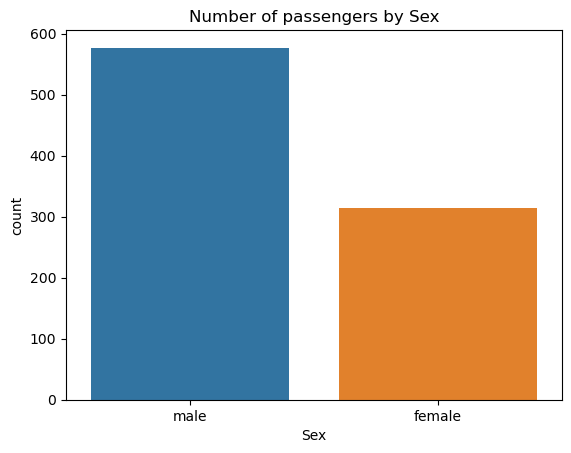

In [18]:
sns.countplot(all_data, x = 'Sex')
plt.title('Number of passengers by Sex')

Text(0.5, 1.0, 'Survival Rate of passengers by Sex')

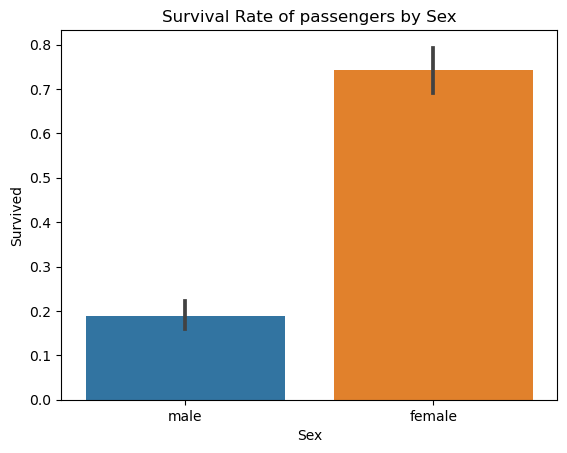

In [19]:
sns.barplot(x = 'Sex', y = 'Survived', data = all_data)
plt.title('Survival Rate of passengers by Sex')

Although males made up the majority of passengers aboard the Titanic, females have a much higher survival rate. This indicates that females were prioritized to be saved over males.

Text(0.5, 1.0, 'Number of Passengers by Pclass')

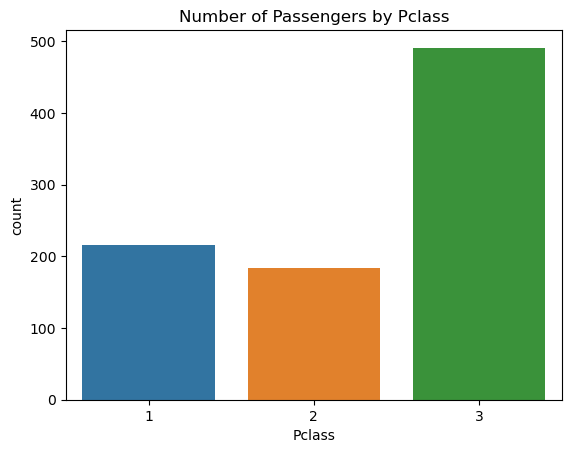

In [21]:
sns.countplot(all_data, x="Pclass")
plt.title('Number of Passengers by Pclass')

Text(0.5, 1.0, 'Number of passengers by Pclass')

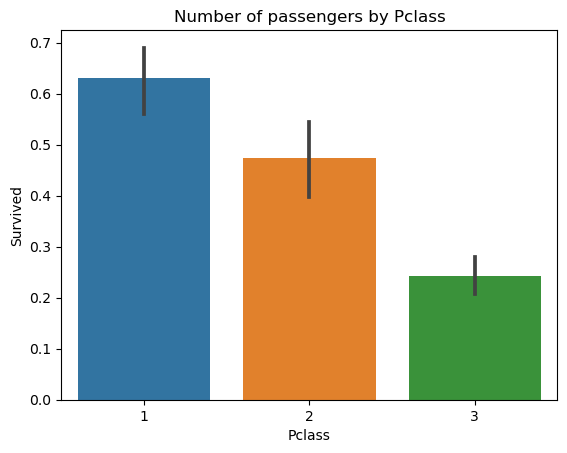

In [22]:

sns.barplot(x = 'Pclass', y = 'Survived', data = all_data)
plt.title('Number of passengers by Pclass')

We see a similar pattern with Pclass. Although a majoriy of passengers were in the 3rd Pclass, 1st class passengers were prioritized to be saved.

Text(0.5, 1.0, 'Bar Chart of counts of Embarkment')

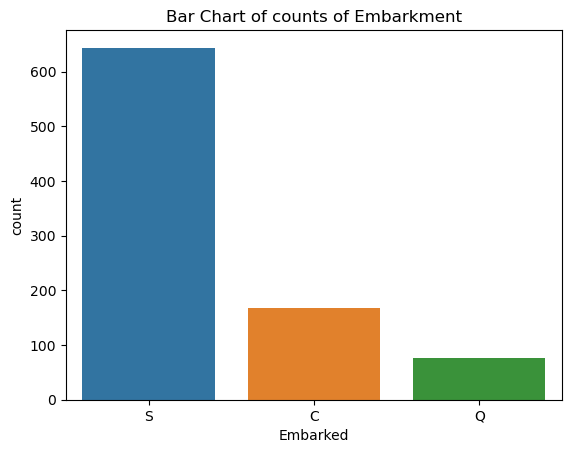

In [24]:
sns.countplot(all_data, x="Embarked")
plt.title('Bar Chart of counts of Embarkment')

Text(0.5, 1.0, 'Survival Rate by point of Embarkation')

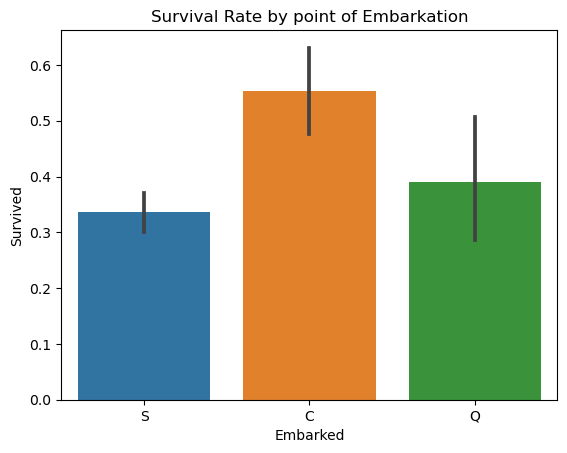

In [25]:
sns.barplot(x = 'Embarked', y ='Survived', data = all_data)
plt.title('Survival Rate by point of Embarkation')

Where a majoriy of passegnder were from Southampton, but that group had the lowest survival rates. There's nothing immediate that explains this phenomenom - maybe the reason is entangled with the other variables we have looked at.

Text(0.5, 1.0, 'Count of Pclass by point of Embarkment')

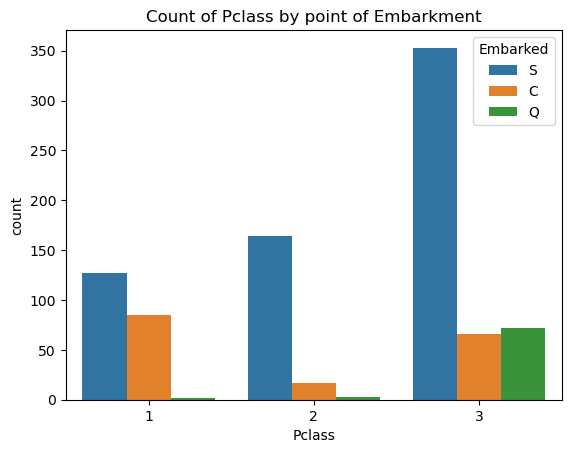

In [27]:
sns.countplot(x = 'Pclass', hue = 'Embarked', data = all_data)
plt.title('Count of Pclass by point of Embarkment')

Text(0.5, 1.0, 'Count of Pclass by Sex')

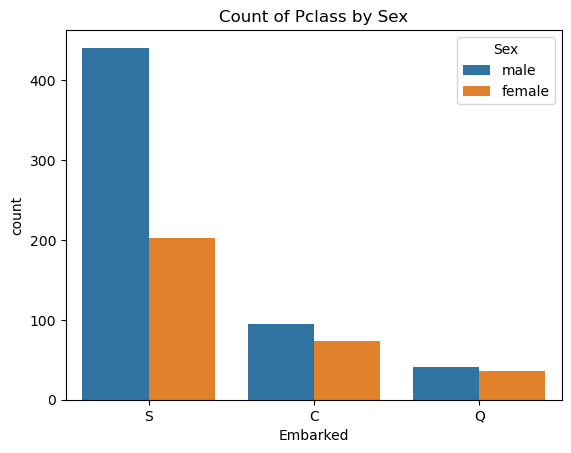

In [28]:
sns.countplot(x = 'Embarked', hue = 'Sex', data = all_data)
plt.title('Count of Pclass by Sex')

It appears that Pclass 3 has both a disproportionately large percentage of Male passengers, and passengers from Southampton. This explains what we saw earlier.

## Numerical Variables

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Age for Death')

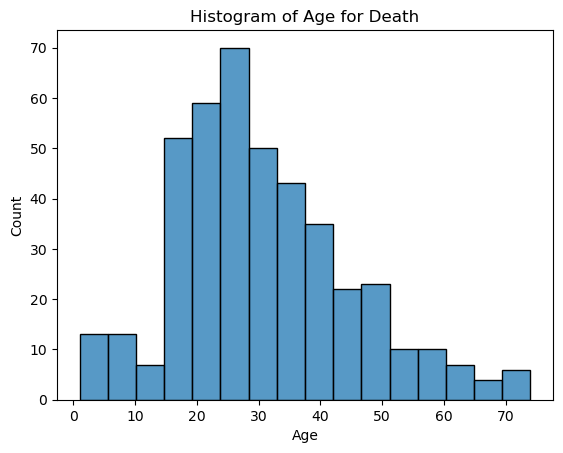

In [31]:
# age
sns.histplot(data = all_data[all_data['Survived'] == 0], x = 'Age')
plt.title('Histogram of Age for Death')

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Age for Survival')

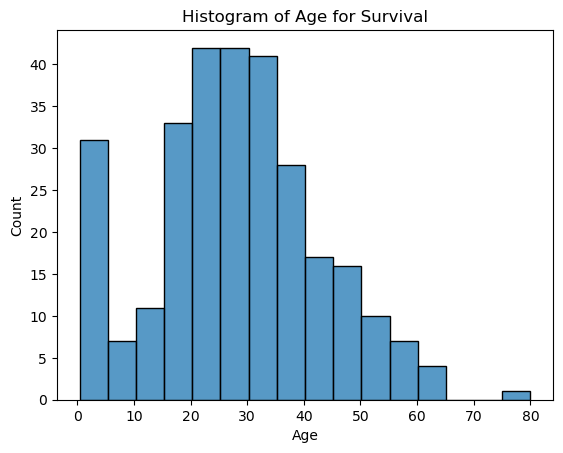

In [32]:
sns.histplot(data  = all_data[all_data['Survived'] == 1], x = 'Age')
plt.title('Histogram of Age for Survival')

It appears only the very young (0-5 yrs old) were prioritized.

Text(0.5, 1.0, 'Survival rate by number of Siblings')

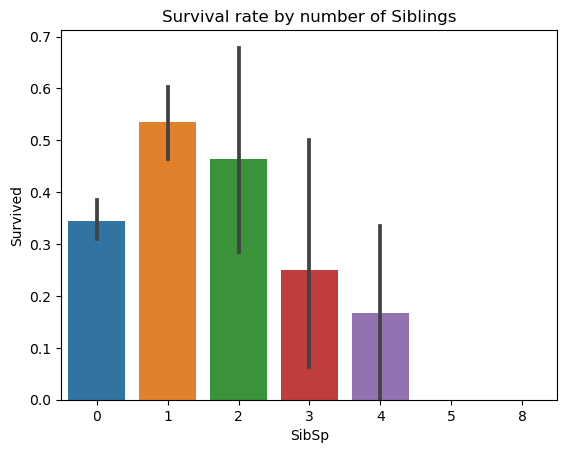

In [34]:
sns.barplot(x = 'SibSp', y ='Survived', data = all_data)
plt.title('Survival rate by number of Siblings')

There is a slight survivorship for 1-2 siblings. Maybe if it was 1-2 sibling they all could get on a lifeboat together, however if you had 3-4 sibilings then perhaps there wasn't enough space on the lifeboats to get everyone off so they decided to go together?

Text(0.5, 1.0, 'Survival rate by Parch')

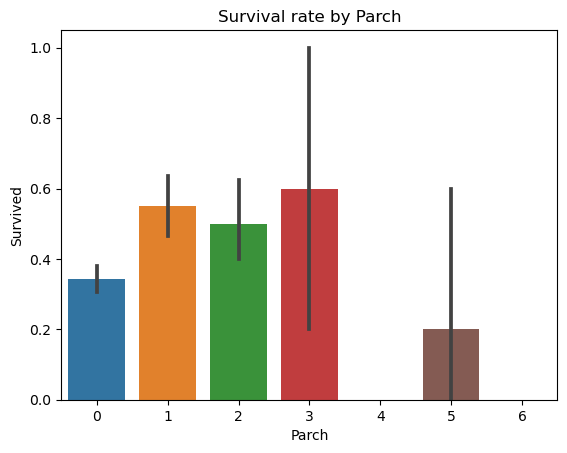

In [36]:
sns.barplot(x = 'Parch', y ='Survived', data = all_data)
plt.title('Survival rate by Parch')

There doesn't seem to be a clear trend with Parch.

## Feature Encoding

In order to train a Machine Learning model, we need to confirm the data is workable. Specifically, the categorical values need to be transformed into numerical data, and Null/Missing values need to be updated. 

In [40]:
# Convert Aex into binary 0,1 where 0 = female, 1 = male
all_data['Sex'] = all_data['Sex'].replace(['female','male'],[0,1])

In [41]:
# Replace missing Age with Median Age
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median)

In [42]:
# Replace missing Embarked with pad
all_data['Embarked'] = all_data['Embarked'].ffill()

In [43]:
all_data.isnull().sum().sort_values(ascending = False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Modeling

In [45]:
features = ['Sex', 'Embarked', 'Pclass', 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(all_data[features])
y = all_data["Survived"]
results = []

In [46]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0, stratify=y)

In [47]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf = accuracy_score(y_test, y_pred)
rf

0.8101694915254237

In [48]:
# Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lr = accuracy_score(y_test, y_pred)
lr

0.8033898305084746

In [49]:
# K-nearest neighbor
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
knn = accuracy_score(y_test, y_pred)
knn

0.7830508474576271

In [50]:
# SVM
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm = accuracy_score(y_test, y_pred)
svm

0.823728813559322

In [51]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt = accuracy_score(y_test, y_pred)
dt

0.7966101694915254

In [94]:
results = [
    ['Random Forest', rf],
    ['Logistic Regression', lr],
    ['K-Nearest Neighbor', knn],
    ['Support Vector Machine', svm],
    ['Decision Tree', dt]
]
head = ['Model Name', 'results']
print(tabulate(results, headers = head, tablefmt='grid'))

+------------------------+-----------+
| Model Name             |   results |
+========================+===========+
| Random Forest          |  0.810169 |
+------------------------+-----------+
| Logistic Regression    |  0.80339  |
+------------------------+-----------+
| K-Nearest Neighbor     |  0.783051 |
+------------------------+-----------+
| Support Vector Machine |  0.823729 |
+------------------------+-----------+
| Decision Tree          |  0.79661  |
+------------------------+-----------+


SVM appears to work the best at predicting this dataset.